In [1]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
from models import Generator
from utils.qr_utils import decode_qr_code

In [2]:
def load_image(image_path):
    image = Image.open(image_path).convert('RGB')
    return image

def prepare_image(image, scale_factor=4):
    transform = transforms.Compose([
        transforms.Resize((image.height // scale_factor, image.width // scale_factor)),
        transforms.ToTensor()
    ])
    image = transform(image).unsqueeze(0)  # Thêm batch dimension
    return image

def show_image(tensor_image):
    image = tensor_image.squeeze().detach().cpu()
    image = transforms.ToPILImage()(image)
    plt.imshow(image)
    plt.axis('off')
    plt.show()


In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Tạo mô hình generator và tải trọng số đã lưu
generator = Generator().to(device)
generator.load_state_dict(torch.load('models/generator_epoch_50.pth', map_location=device))
generator.eval()

Generator(
  (conv1): Conv2d(3, 64, kernel_size=(9, 9), stride=(1, 1), padding=(4, 4))
  (relu): ReLU(inplace=True)
  (res_blocks): Sequential(
    (0): ResidualBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): ResidualBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (2): ResidualBlock(
      (con

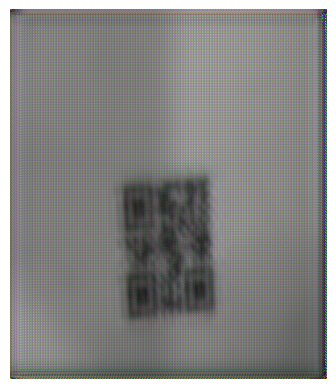

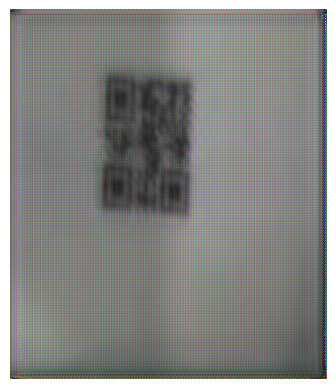

In [4]:
def test_model(image_path):
    # Tải và chuẩn bị ảnh
    image = load_image(image_path)
    input_image = prepare_image(image).to(device)
    
    # Tạo ảnh siêu phân giải
    with torch.no_grad():
        sr_image = generator(input_image)
    
    # Hiển thị ảnh siêu phân giải
    show_image(sr_image)
    
    # Giải mã QR code từ ảnh siêu phân giải
    #decoded_text = decode_qr_code(sr_image[0].cpu().numpy())
    #print(f"Decoded QR Code Text: {decoded_text}")

# Kiểm tra mô hình với một ảnh ví dụ
test_model('data/qr_code/input/img_2.jpg')
test_model('data/qr_code/input/img_1.jpg')